In [50]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import random
from sklearn.metrics import precision_score, accuracy_score
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# , GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
import pickle

data = pd.read_csv('/home/abc/Downloads/CpuLogData.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/prayas2409/logs/master/CpuLogData.csv')

required = ["stephen.16.rmd@gmail.com","vishnu23kumar@gmial.com","vaibhavkhadake@gmail.com","antonyalexcm@gmail.com",
            "sachinvd7@gmail.com",'sharlawar77@gmail.com', 'iamnzm@outlook.com',"akshaybavalekar100@gmail.com",
       'rahilstar11@gmail.com', 'markfernandes66@gmail.com','salinabodale73@gmail.com', 'bhagyashrichalke21@gmail.com',
       'damodharn21@gmail.com', 'deepshukla292@gmail.com','indrajeetgajbhiye@gmail.com', 'durganath123@outlook.com',
       'prabhnoor.parry@gmail.com', 'farooqbassam4@gmail.com','ankitbhadani94@gmail.com']

data = data[data['user_name'].isin(required)]
# ----------------------------------------- 
def remove_col(data,col_list):
    data.drop(columns=col_list, inplace=True)
    return data

# ----------------------------------------- 
def feature_engineering(feature_eng_col, data):      
    user_name = data['user_name'].unique()
    final_df = pd.DataFrame()
    # print(user_name)
    for u_name in user_name:
        df = data[data['user_name'] == u_name]
        df.sort_values('DateTime', inplace=True)
        df.reset_index(drop=True, inplace=True)
        for col in feature_eng_col:
            l1 =[]
            l1.append(df[col].iloc[0])
            for index in range(1,len(df)):

                if (df["Dates"].iloc[index] == df["Dates"].iloc[index-1]):
                    # As when curr smaller than prev
                    if (df[col].iloc[index]-df[col].iloc[index-1]) <= 0:
                        l1.append(df[col].iloc[index])
                        # curr > prev
                    elif (df[col].iloc[index]-df[col].iloc[index-1]) > 0:
                        l1.append(df[col].iloc[index]-df[col].iloc[index-1])
                else:
                    l1.append(df[col].iloc[index])
            df[col+"_fe"]=l1
        final_df = final_df.append(df)
        for col in feature_eng_col:
            final_df.drop(columns=col, inplace=True)
    return final_df


In [51]:
model_pickle = open("model.pkl","wb")

In [2]:
# ----------------------------------------- 
def preprocessing(data):
    # Remove constant data
    constant_col = ['Cpu Count', 'Usage Cpu Count ', 'number of system calls since boot'
                    , 'system_total_memory', 'total number of errors while receiving'
                    ,'total number of errors while sending','total number of incoming packets which were dropped'
                    ,'total number of outgoing packets which were dropped', 'disk_total_memory']

    feature_eng_col = ['Cpu Working Time', 'Cpu idle Time', 'number of software interrupts since boot'
                       ,'number of interrupts since boot', 'disk_read_count', 'disk_write_count'
                       ,'disk_read_bytes', 'disk_write_bytes', 'time spent reading from disk'
                       ,'time spent writing to disk', 'time spent doing actual I/Os'
                       ,'number of bytes sent', 'number of bytes received'
                       ,'number of packets sent', 'number of packets recived']

    # Remove Inter dependent data
    inter_dependet_cols = ['system_free_memory', 'disk_free_memory', 'system_avalible_memory', 'system_used_memory']

    data['Dates'] = pd.to_datetime(data['DateTime']).dt.date
    data['Time'] = pd.to_datetime(data['DateTime']).dt.time
    data = remove_col(data, inter_dependet_cols)
    # data.columns
    data = remove_col(data, constant_col)
    return feature_engineering(feature_eng_col, data)

In [3]:
# object type data 
object_col = ['DateTime', 'Dates', 'Time', 'boot_time']
final_df = preprocessing(data)

# final_df.drop(columns=object_col,inplace=True)
data.shape, final_df.shape

((11966, 34), (11966, 34))

In [4]:
data['user_name'].unique()

array(['sharlawar77@gmail.com', 'iamnzm@outlook.com',
       'rahilstar11@gmail.com', 'markfernandes66@gmail.com',
       'salinabodale73@gmail.com', 'bhagyashrichalke21@gmail.com',
       'damodharn21@gmail.com', 'deepshukla292@gmail.com',
       'indrajeetgajbhiye@gmail.com', 'durganath123@outlook.com',
       'prabhnoor.parry@gmail.com', 'farooqbassam4@gmail.com',
       'ankitbhadani94@gmail.com'], dtype=object)

In [5]:
perform = ["akshaybavalekar100@gmail.com",'farooqbassam4@gmail.com',"sachinvd7@gmail.com","antonyalexcm@gmail.com",
           "prabhnoor.parry@gmail.com",'indrajeetgajbhiye@gmail.com',"rahilstar11@gmail.com","markfernandes66@gmail.com"
           ,"deepshukla292@gmail.com","gaurav23091996@gmail.com","iamnzm@outlook.com"]
chal = ['ankitbhadani94@gmail.com','vaibhavkhadake@gmail.com',"stephen.16.rmd@gmail.com","","sharlawar77@gmail.com",
        "salinabodale73@gmail.com",'durganath123@outlook.com',"bhagyashrichalke21@gmail.com","someshj5@gmail.com",
        "damodharn21@gmail.com"
       ]

In [6]:
final_df["status"]=1
for each in chal:
    final_df["status"].loc[final_df["user_name"]==each]=0

In [7]:
one_hot_encoded_cols=final_df['technology'].unique()
# ----------------------------------------- 
pickle.dump(one_hot_encoded_cols,model_pickle)

In [8]:
def one_hot_techo(df):
    le = LabelEncoder()
    oe = OneHotEncoder()
    tech_nums=le.fit_transform(df['technology'])
    oe.fit(np.array(tech_nums).reshape(-1, 1))
    abc = oe.transform(np.array(tech_nums).reshape(-1, 1)).toarray()
    techs=data['technology'].unique()
    techs.sort()
    print(techs)
    for index in range(len(techs)):
        if index<(len(techs)-1):
            df[techs[index]]=abc[:,index]
 # -----------------------------------------    
    pickle.dump(le,model_pickle)
    pickle.dump(oe,model_pickle)
    return df
new=one_hot_techo(final_df)

['angular' 'devops' 'java' 'php' 'python']


In [9]:
from sklearn.preprocessing import RobustScaler
def std(input_df):
    # standardize the data attributes
    object_df=pd.DataFrame() 
    for col in input_df.columns:
        if input_df[col].dtype == 'object' or (col=='status') or (col in one_hot_encoded_cols):
            object_df[col] = input_df[col]
            input_df=input_df.drop(columns=col)
    not_standard = object_df.columns
# -----------------------------------------    
    pickle.dump(not_standard,model_pickle)
    rs = RobustScaler()
    standardized_X = rs.fit_transform(input_df)
    new_data = pd.DataFrame(standardized_X, columns=input_df.columns)
    for col in object_df.columns:
        if col not in new_data.columns:
            new_data = new_data.reset_index(drop=True)
            object_df=object_df.reset_index(drop=True)
            new_data[col]=object_df[col]
    return new_data
new_data = std(new)

In [10]:
new_data.columns

Index(['Cpu Working Time_fe', 'Cpu idle Time_fe', 'cpu avg load over 1 min',
       'cpu avg load over 15 min', 'cpu avg load over 5 min', 'cpu_percent',
       'disk_read_bytes_fe', 'disk_read_count_fe', 'disk_used_memory',
       'disk_write_bytes_fe', 'disk_write_count_fe', 'files_changed',
       'keyboard', 'mouse', 'number of bytes received_fe',
       'number of bytes sent_fe', 'number of interrupts since boot_fe',
       'number of packets recived_fe', 'number of packets sent_fe',
       'number of software interrupts since boot_fe', 'system_active_memory',
       'system_buffers_memory', 'system_cached_memory',
       'system_inactive_memory', 'system_shared_memory',
       'time spent doing actual I/Os_fe', 'time spent reading from disk_fe',
       'time spent writing to disk_fe', 'DateTime', 'Dates', 'Time',
       'boot_time', 'technology', 'user_name', 'status', 'angular', 'devops',
       'java', 'php'],
      dtype='object')

In [12]:
avg_df=pd.DataFrame(new_data.groupby(["user_name","Dates"]).mean())
avg_df.columns

Index(['Cpu Working Time_fe', 'Cpu idle Time_fe', 'cpu avg load over 1 min',
       'cpu avg load over 15 min', 'cpu avg load over 5 min', 'cpu_percent',
       'disk_read_bytes_fe', 'disk_read_count_fe', 'disk_used_memory',
       'disk_write_bytes_fe', 'disk_write_count_fe', 'files_changed',
       'keyboard', 'mouse', 'number of bytes received_fe',
       'number of bytes sent_fe', 'number of interrupts since boot_fe',
       'number of packets recived_fe', 'number of packets sent_fe',
       'number of software interrupts since boot_fe', 'system_active_memory',
       'system_buffers_memory', 'system_cached_memory',
       'system_inactive_memory', 'system_shared_memory',
       'time spent doing actual I/Os_fe', 'time spent reading from disk_fe',
       'time spent writing to disk_fe', 'status', 'angular', 'devops', 'java',
       'php'],
      dtype='object')

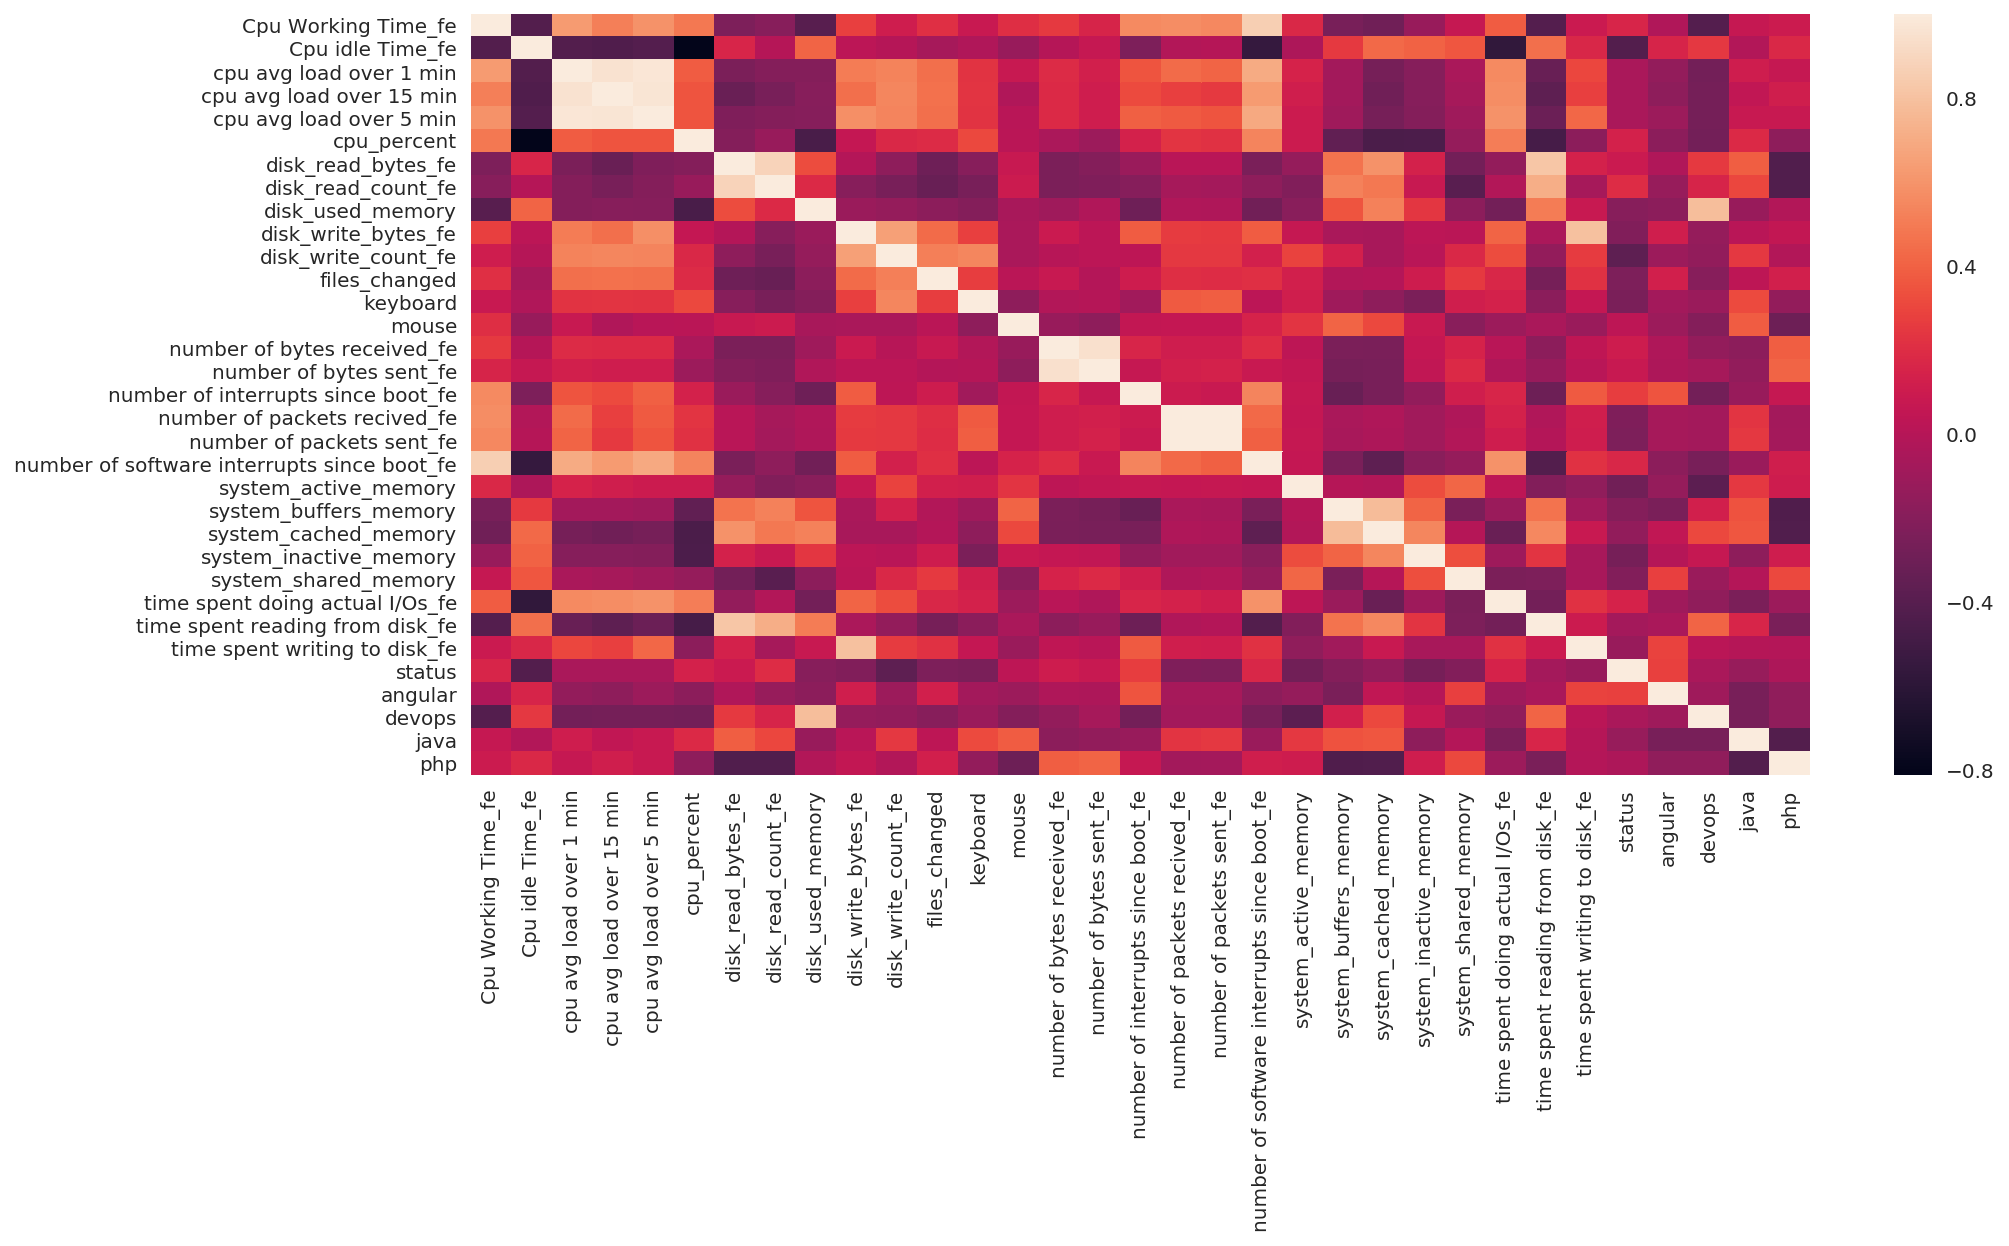

In [13]:
plt.figure(figsize=(15,7))
sns.heatmap(avg_df.corr())

In [14]:
corrs=avg_df.corr()['status']
high_corr_cols=[]
for each in corrs.index:
    if corrs[each]>0:
        high_corr_cols.append(each)

In [15]:
# -----------------------------------------------
pickle.dump(high_corr_cols,model_pickle)

['Cpu Working Time_fe',
 'cpu_percent',
 'disk_read_bytes_fe',
 'disk_read_count_fe',
 'mouse',
 'number of bytes received_fe',
 'number of bytes sent_fe',
 'number of interrupts since boot_fe',
 'number of software interrupts since boot_fe',
 'time spent doing actual I/Os_fe',
 'status',
 'angular']

In [16]:
df_for_model = avg_df[high_corr_cols]

In [17]:
df_for_model.columns

Index(['Cpu Working Time_fe', 'cpu_percent', 'disk_read_bytes_fe',
       'disk_read_count_fe', 'mouse', 'number of bytes received_fe',
       'number of bytes sent_fe', 'number of interrupts since boot_fe',
       'number of software interrupts since boot_fe',
       'time spent doing actual I/Os_fe', 'status', 'angular'],
      dtype='object')

In [18]:
labels = df_for_model['status']
df_for_model=df_for_model.drop(columns='status')

In [19]:
df_for_model,x_cross,labels,y_cross = train_test_split(df_for_model,labels,test_size=0.2)

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
rand_classifier = RandomForestClassifier()
# grad_boost_classifier = GradientBoostingClassifier()
# xgboost_classifier = XGBClassifier()
# decision_classifier = DecisionTreeClassifier()
# nb_classifier = GaussianNB()

In [47]:
rand_classifier.fit(df_for_model,labels)
# grad_boost_classifier.fit(df_for_model,labels)
# xgboost_classifier.fit(df_for_model,labels)
# decision_classifier.fit(df_for_model,labels)
# nb_classifier.fit(df_for_model,labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
# from sklearn.cross_validation import cross_val_score
# classifier_list = [rand_classifier,grad_boost_classifier,xgboost_classifier,decision_classifier,nb_classifier]
# for each in classifier_list:
#     print(each)
#     accuracy = cross_val_score(cv = 10, estimator= each, X = df_for_model, y = labels)
#     print(accuracy.mean(),accuracy.std(),'\n\n')

In [48]:
y_pred=rand_classifier.predict(x_cross)
print(accuracy_score(y_cross,y_pred))
print(confusion_matrix(y_pred,y_cross))

0.8461538461538461
[[12  2]
 [ 2 10]]


In [49]:
pickle.dump(rand_classifier,model_pickle)
model_pickle.close()